In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(1)

## What is Information?

- information should be additive when they are independent
- information must be large when it is rare, small when it is common.
- information of an event can be defined as the reciprocal of the probability of the event.
$$
    h(X) = 1/P(X)
$$
- So, information is a function of the probability of a discrete random varaible, and can be defined.

### Calculate inforamation
1. Binary random variable $X \sim \{0, 1\}$, with $P(X=1)=0.7$
2. Categorical Variable with 4 events $X \sim \{ A, B, C, D\}$ or equivalently $X\sim\{0,1,2,3\}$; 
    1. $P(X) = [1/4, 1/4, 1/4, 1/4]$
    1. $P(X) = [1/2, 1/4, 1/8, 1/8]$
    1. $P(X) = [0.9, 0.1/3, 0.1/3, 0.1/3]$

## What is Entropy?

- Entropy is defined to be the expection of the information function  

$$
    \begin{align}
      H(X) =  \mathbb{E}_X\big[ h(X) \big] & = \sum_i P(x_i) h(x_i) \\
                                     & = \sum_i P(x_i) \log\big(1/P(x_i)\big) \\
                                     & = - \sum_i P(x_i) \log P(x_i)
    \end{align}
$$

### Examples
- Entropy of a binary random variable $X \sim \{ 0, 1 \}$ with probability $P(X=1) = p$ (Bernoulli distribution)

$$
    H(X) = -\big(p \log p + (1-p) \log(1-p) \big) = H(p)
$$

- Entropies of discrete random varibles given above. Use $\log_2$; then its unit is bit.

In [2]:
def H2(p, log='log2'):
    logf = np.log2 if log=='log2' else np.log10
    H_p = - (p * logf(p) + (1-p) * logf(1-p))
    return H_p

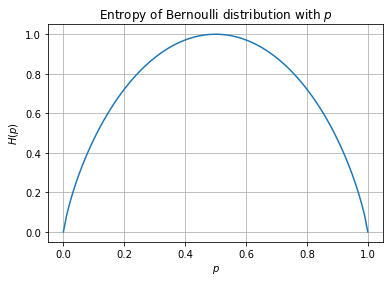

In [3]:
eps = 0.00001
p = np.linspace(0+eps, 1-eps, 100)
H_p = H2(p)

plt.plot(p, H_p);
plt.grid(True)
plt.title('Entropy of Bernoulli distribution with $p$');
plt.xlabel('$p$')
plt.ylabel('$H(p)$');

- When $p=0.5$ the entropy is maximum; the average of information quanity carried by the distribution (or the random variable) is maximum.

### Categorical Distribution (N discrete events)

- Let's think about a discrete random variable $N$ dimension. 
- We have $N$ events $\{x_i\}$ and probabilities $p_i$ with constraint $\sum_i p_i = 1$
  
- For a uniform distribution with dimension $N$, the entropy is 

$$
    H(X) = -\sum_{i=1}^N 1/N \log (1/N) = \sum 1/N \log N = \log N
$$


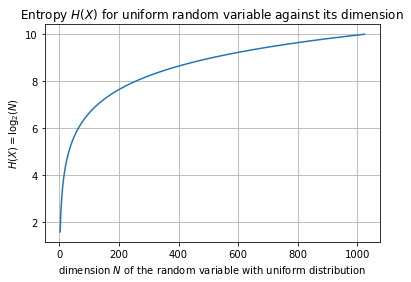

In [4]:
n = np.arange(3, 1025)
H_p = np.log2(n)

plt.plot(n, H_p)
plt.grid(True)
plt.xlabel('dimension $N$ of the random variable with uniform distribution')
plt.ylabel('$H(X) = \log_2(N)$')
plt.title('Entropy $H(X)$ for uniform random variable against its dimension');

- For a fixed dimension, e.g. $N=16$, the entropy $H$ of the uniform random variable is $H(X) = \log_2(N) = 4$.
    - For a set of 16 symbols, we need 4 bits to represent them in binary number system. So we may think that the symbols are assumed to have probability $1/N$ equally.
- What if the distribution is not uniform?

In [5]:
def H(p, logf=np.log2):
    entropy = -sum(p*logf(p))
    return entropy

min(H) = 3.074  max(H) = 3.975


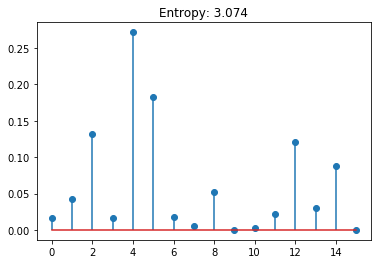

In [6]:
N = 16
Hx = []
Ps = []
for i in range(100000):
    p = np.random.uniform(low=0., high=1., size=(N)) # create a discrete distribution
    p /= sum(p) # normalize so that p is a discrete distribution
    Hx.append(H(p))
    Ps.append(p)
#
print(f'min(H) = {np.min(Hx):.4}  max(H) = {np.max(Hx):.4}')

plt.stem(Ps[np.argmin(Hx)], use_line_collection=True);
plt.title(f'Entropy: {np.min(Hx):.4}');

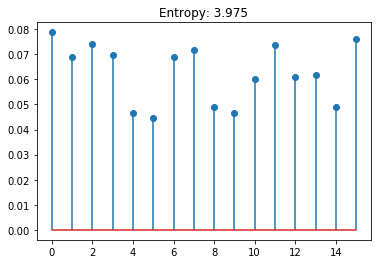

In [7]:
plt.stem(Ps[np.argmax(Hx)], use_line_collection=True)
plt.title(f'Entropy: {np.max(Hx):.4}');

When we tested many cases of discrete distributions with $N=16$, the entropy values varied from 3.18 to 3.97. In terms of bit length, there were cases that we need only 3.2 bits to represent 16 symbols. Note that 4 bits is the maximum entropy. This is the basis of the variable-length coding theory. Refer to [Huffman coding algorithm](https://en.wikipedia.org/wiki/Huffman_coding).

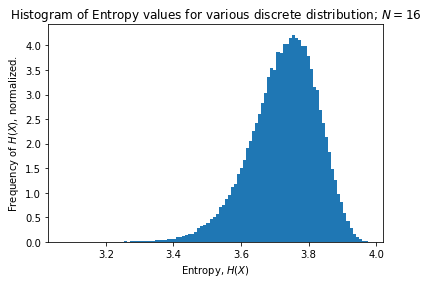

In [8]:
plt.hist(Hx, bins=100, density=True)
plt.xlabel('Entropy, $H(X)$')
plt.ylabel('Frequency of $H(X)$, normalized.')
plt.title('Histogram of Entropy values for various discrete distribution; $N=16$');

### from Wikipedia
- A source generates 4 different symbols $\{a_{1},a_{2},a_{3},a_{4}\}$ with probability $\{0.4;0.35;0.2;0.05\}$.

A binary tree is generated from left to right taking the two least probable symbols and putting them together to form another equivalent symbol having a probability that equals the sum of the two symbols. The process is repeated until there is just one symbol. The tree can then be read backwards, from right to left, assigning different bits to different branches. 

- draw the tree

The final Huffman code is: {0, 10, 110, 111}

The standard way to represent a signal made of 4 symbols is by using 2 bits/symbol, but the entropy of the source is 1.74 bits/symbol. If this Huffman code is used to represent the signal, then the average length is lowered to 1.85 bits/symbol; it is still far from the theoretical limit because the probabilities of the symbols are different from negative powers of two.

In [9]:
p = np.array([0.4, 0.35, 0.2, 0.05])
info = -np.log2(p)
H_p = np.dot(p, info)

print('The entropy of the source is ', H_p)

bitlen = np.array([1, 2, 3, 3])
print('avg bit len = ', np.dot(p, bitlen), 'bits/symbol')

print('bitlen: ', bitlen)
print('Informatin: ', info)
print('bitlen - info: ', bitlen - info)

The entropy of the source is  1.7393538721672006
avg bit len =  1.85 bits/symbol
bitlen:  [1 2 3 3]
Informatin:  [1.32192809 1.51457317 2.32192809 4.32192809]
bitlen - info:  [-0.32192809  0.48542683  0.67807191 -1.32192809]


## Cross Entropy
https://en.wikipedia.org/wiki/Cross_entropy

- Definition:

$$
    H(p,q) = \mathbb{E}_{X\sim p} \big[ q(X) \big] = - \sum_i P(x_i) \log_2 Q(x_i)
$$

- Cross entropy can be interpreted as the expected message-length per datum when a wrong distribution $q$ is assumed while the data actually follows a distribution $p$.

In [10]:
def cross_entropy(p, q, log=np.log2):
    return -np.dot(p, log(q))

In [11]:
# create a random distribution of dim 16
p = np.random.uniform(0, 1, size=(16))
p /= sum(p)

# Let us assume that our empirical $q$ is assumed to be uniform even though the true density is $p$.
q = np.ones(16) / 16.

# cross-entropy
cr = cross_entropy(p, q)

print('cross entropy (p,q) = ', cr)

cross entropy (p,q) =  4.000000000000001


In [12]:
# reversed case
print('cross entropy (q,p) = ', cross_entropy(q, p))

cross entropy (q,p) =  4.280339179101606


In [13]:
def random_dist(N=16):
    """ create a random distribution of dim 16 """
    p = np.random.uniform(0, 1, size=(16))
    p /= sum(p)
    return p

p = random_dist()

q_unif = np.ones(16) / 16. # this case means that we have chosen to use the maximum entropy configuration. Since we are using maximum bit length, the cross entropy is always 4.

print('cross entropy (q,p) = ', cross_entropy(p, q_unif))

cr_samples = [cross_entropy(random_dist(), q_unif) for _ in range(10000)]

print(min(cr_samples), max(cr_samples))

cross entropy (q,p) =  4.000000000000002
3.9999999999999982 4.000000000000002


- Above case is when $p$ may have an entropy (code length, bit length) value less than 4 which is the maximum. Empirically, one may simply assume that $p$ was uniform constant $1/N$, so $q = 1/N$. In this case the cross entropy is always 4 since the user is already using the maximum entropy coding scheme.

- Below; let's try best to this simpleness and made an approximate empirical distribution $q$ (which was supposed to be almost the same as $p$ not actually not).

In [14]:
p

array([0.08529523, 0.08163276, 0.10818668, 0.03043486, 0.09562954,
       0.08945373, 0.07584273, 0.00839011, 0.0941051 , 0.00769868,
       0.04854286, 0.0780186 , 0.04211697, 0.06422927, 0.00792577,
       0.08249711])

In [15]:
H(p)

3.746884177738909

In [16]:
p = random_dist()
print('Entropy of p: ', H(p))

cr_samples = [cross_entropy(p, random_dist()) for _ in range(100000)] # q is simulated using random_dist()
print('cr range    : ', min(cr_samples),  max(cr_samples))

Entropy of p:  3.691441468305738
cr range    :  3.7670092706420286 7.083110006523068


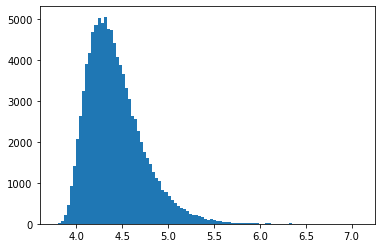

In [17]:
plt.hist(cr_samples, bins=100);

- Mostly, randomly chosen empirical distribution $q$ resulted in larger values of cross entropy. This is why CR can be used as a loss function to estimate probability distribution from data.

## KL Divergence

- Unfortunately, the cross entropy does not show how far $q$ is from $p$. This may be overcome by using KL-divergence:

$$
    \begin{align}
        KL(p||q) & = H(p,q) - H(p) \\
                 & = \mathbb{E}_{p} (\log 1/q) - \mathbb{E}_{p} (\log 1/p) \\
                 & = \mathbb{E}_{p} (\log p/q)
    \end{align}
$$

In [18]:
def KLDiv(p, q, log=np.log2):
    return -sum(p*log(q)) - (-sum(p*log(p)))

kld range    :  0.072366066149542 3.1639790193726633


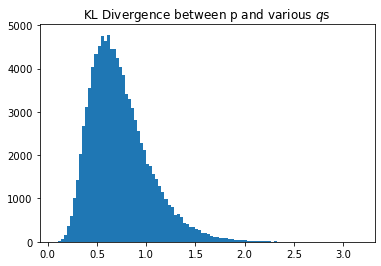

In [19]:
kld_samples = [KLDiv(p, random_dist()) for _ in range(100000)] # q is simulated using random_dist()

print('kld range    : ', min(kld_samples),  max(kld_samples))
plt.hist(kld_samples, bins=100);
plt.title('KL Divergence between p and various $q$s');

---
## Cross-entropy loss function and logistic regression

- The true probability $p_i$ is the true label, and the given distribution $q_i$ is the predicted value of the current machine learning model.

- Logistic regression is used to classify observations into two possible classes (often simply labelled 0 and 1).
- The output of the ML model for a given observation (a feature vector $x$) can be interpreted as a probability.

- The probability is modeled using the **logistic function**:
$$
    q_{y=1} = \hat{y} = \sigma(w\cdot x) = \frac{1}{1+\exp\{-w\cdot x\}}
$$
where the vector $w$ is optimized through some appropriate algorithm such as gradient descent.
- Similarly, the complementary probability of finding the output $y=0$ is simply given by:
$$
    q_{y=0} = 1 - q_{y=1}
$$
- Having set up our notation, $p_i$ and $q_i$ we can use cross entropy to get a measure of dissimilarity between $p$ and $q$:
$$
    \begin{align}
        H(p,q) & = -\sum_i p_i \log q_i \\
                & = -y \log\hat{y} - (1-y)\log(1-\hat{y}) \\
                & = 
                    \begin{cases}
                        -\log\hat{y} & \text{ if $y=1$ } \\
                        -\log (1-\hat{y}) & \text{ if $y=0$ }
                    \end{cases}
    \end{align}
$$
where $\hat{y}$ is substituted with $\sigma(w\cdot x)$.

- Note that this may be extended to Categorical case where more than two classes are given by replacing $\sigma(\cdot)$ by soft-max function.

- Typically logistic regression optimizes the log-loss for all the observations. Given $N$ independent samples the loss is:
$$
    \begin{align}
        \mathcal{L}(w) & = \frac{1}{N}\sum_{n=1}^N H(p_n, q_n) \\
        & = \frac{1}{N}\sum_{n=1}^N \bigg[-y \log\hat{y}_n - (1-y)\log(1-\hat{y}_n) \bigg]
     \end{align}
$$
where $\hat{y}_n = \sigma(w\cdot x_n)$.

---
### About CrossEntropyLoss() & Soft-Max 
- Suppose we give a data $x$ of class $k$. The model outputs 10 dimensional score vector  $s$.
- Softmax is the next procedure to be applied to the score vector to produce predicted class probabilities $q$:
$$
    \begin{align}
        q_i & = {e^{s_i}}\big/{\sum_j e^{s_j}} \\
            & = \mbox{softmax(s, label=i)}
    \end{align}
$$

- Loss function is chosen to be cross entropy, as all the other classification problems:
$$
    H(p, q) = -\sum_i p_i \log q_i
$$

- Here we have model probability $p=OneHot(k)$ which has 0s at all the locations but 1 at the $k$th location.   It does not have to be OneHot vector as a probability density model. If an input may be categorized to two objects at the same time, $p=[0,... 1/2, ..., 1/2, ... 0]$.

$$ p=OneHot(k) = [0, ... 1 ... 0] 
$$
    
- Therefore, the cross-entropy for this particular case is

$$
    \begin{align}
        H(p, q)  & =  - p_k \log q_k \\
                 & =  - \log q_k     \\
                 & =  - \log\big( {e^{s_k}}/{\sum_j e^{s_j}} \big) \\
                 & = -\bigg(s_k - \log\big(\sum_j e^{s_j}\big) \bigg)
    \end{align}
$$

- Numerical computation of this formula is much more stable than computing $\log(\exp(s_k))$ step by step.
- Given a score vector, pytorch `nn.CrossEntropyLoss()` computes this loss.
- That is, `nn.CrossEntropyLoss()` = `NLLLoss(LogSoftMax())`

* Why Cross Entropy?
    - $H(p, q)$ has a minimum value when $q$ is equal to $p$.

---
### Cross Entropy & Maximum Likelihood Estimate

- The probability mass function $q_i=P(C=i|x)$, i=0...9, of being class $i$ given an input $x$ is computed through a neural network model.
- Given this probatility mass $q=[q_i]$, what is the data likelihood?
    - In the case of Gaussian distribution modeling for regressin problems, the output of neural network model is the mean $\mu(x)$ and std $\sigma(x)$ given $x$. The likelihood is given by
    
    $$
        \begin{align}
        L & = Prob( y-delta < y < y+delta | x) \\
          & = \delta \cdot \cal{N}(y | \mu(x), \sigma(x)) \\
          & = \exp\bigg\{ -0.5 (y - \mu(x))^2 / \sigma(x)^2 \bigg\} \big/ \sqrt{2\pi}\sigma(x)
        \end{align}
    $$
    
    This is used for regression problems. Linear regression must be the easiest case.
    
    - In the case binary classification using Bernoulli distribution, given a probability $p$ given by a NN model $p(x)$, the likelihood is 
    $$
        L = Prob(label = 1 | x) = p = p(x, w)
    $$
    
    - In cas of Multinoulli distribution, we have $C=10$ multiple candidates and $C$ discrete probabilities $p_i$, $\sum_i p_i = 1$
    
    - Since we are trying to make a model that predicts the probability, given a data $(x, k)$, $k$ being a GT label, we have a predicted probability vector $q_i = \mbox{NN}(x; w) \in \mathbb{R}^{10}$. It is an estimate of true $p_i$, The likelihood is 
    $$
        \begin{align}
            L   & = Prob(label = k | x) = q_k \\
                & = \mbox{ the $k$-th output from SoftMax() }
        \end{align}
    $$
    and we want to maximize $L$, the class probability, by modifying $w$, the parameters of NN.
    - For numerical stability mostly, we may instead maximize its logarithmic version
    $$
        l = l(w) = \log q_k(x, w)
    $$
       
    - The numerical package in PyTorch does only minimization. So we minimize the negative of the log-likelihood:
    $$
        \begin{align}
            NLL(w) & = -l(w) \\
                    & = -\log q_k(x, w) \\
                    & = - \log\big(\mbox{SoftMax}(s_k(x,w))\big)
        \end{align}
    $$
    
    * So we are minimizing the **cross-entropy** of $p = \delta_k$ and $q = [q_i], i = 0, ..., 9$.

---
### Cross Entropy & Kullback-Leibler divergence
- KL Divergence

$$
    D_\mathrm{K}(p||q) = H(p,q) - H(p,p)
$$

- Cross Entropy

$$
    H(p,q) = - \sum_i p_i \log q_i
$$

- Information Entropy (Average Information)

$$
    \begin{align}
        H(p,p) = H(p) & = - \sum_i p_i \log p_i \\
        & = \sum_i p_i \log \frac{1}{p_i}
    \end{align}
$$

- Information

$$
    h(p_i) = \log\frac{1}{p_i} = h(x_i)
$$
where $x_i$ is a particular outcome/event of the random variable $X$.

- Expection of $h(x_i)$ is defined to be $H(p)$ or denoted to be $H(X)$
    
$$
    \mathbb{E}(h(x_i)) = H(p) = H(X)
$$
#### References
- https://en.wikipedia.org/wiki/Entropy_(information_theory)
- https://en.wikipedia.org/wiki/Cross_entropy
- https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence


End.